# Imports necessários

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from numpy import mean
from numpy import std
from matplotlib import pyplot
import seaborn as sns

# Import dos dados

## Receitas

In [2]:
dados_receitas = pd.read_csv('03_dados_carga/arquivos_para_carga/dados_receitas.csv', sep=';')
dados_receitas.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal
1,1722010101,2013-01-04,886cd0eabf5a18,8081.80,prefeitura municipal
2,1722010101,2013-01-07,886cd0eabf5a18,4231.39,prefeitura municipal
3,1722010101,2013-01-08,886cd0eabf5a18,10536.53,prefeitura municipal
4,1722010101,2013-01-15,886cd0eabf5a18,103118.27,prefeitura municipal


# Feature Engineering

## Receitas

### Sample dos dados

In [3]:
# Converter a coluna 'DATA' para o tipo datetime
dados_receitas['DATA'] = pd.to_datetime(dados_receitas['DATA'])

# Extrair o ano, mês e dia da coluna 'DATA' como novas features
dados_receitas['ANO'] = dados_receitas['DATA'].dt.year

In [4]:
# Coluna pela qual você deseja amostrar proporcionalmente
coluna_amostragem = 'ANO'

# Porcentagem de amostras desejadas)
porcentagem_amostra = 0.001

# Divida o DataFrame em grupos com base na coluna de amostragem
grupos = dados_receitas.groupby(coluna_amostragem, group_keys=False, sort=False)

# Inicialize listas para armazenar os DataFrames de amostra e de não amostra
amostras = []
nao_amostras = []

# Para cada grupo, aplique o método sample com a porcentagem desejada
for nome_grupo, grupo in grupos:
    grupo_amostra = grupo.sample(frac=porcentagem_amostra)
    
    # Adicione o grupo de amostra à lista de amostras
    amostras.append(grupo_amostra)
    
    # Adicione o grupo de não amostra à lista de não amostras
    grupo_nao_amostra = grupo.drop(grupo_amostra.index)
    nao_amostras.append(grupo_nao_amostra)

# Crie um novo DataFrame contendo todas as amostras
df_amostrado = pd.concat(amostras)

# Crie um novo DataFrame contendo todos os dados que não entraram no sample
df_nao_amostrado = pd.concat(nao_amostras)

In [5]:
df_amostrado['SMA(12)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=12).mean()
df_amostrado['SMA(6)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=6).mean()
df_amostrado['SMA(3)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_amostrado['SMA(2)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2)
6594,1721340016,2013-08-19,1f4cc11a393303,1664.80,instituto de previdencia e assistencia social,2013,NaN,NaN,NaN,NaN
1200,1113050001,2013-05-14,886cd0eabf5a18,76.33,prefeitura municipal,2013,NaN,NaN,870.565,870.565
7420,1918000001,2013-10-11,470c93ab945237,798.22,sctrans,2013,NaN,NaN,437.275,437.275
2407,1121250001,2013-09-04,886cd0eabf5a18,175.26,prefeitura municipal,2013,NaN,NaN,486.740,486.740
6643,1721340015,2013-10-04,1f4cc11a393303,12500.00,instituto de previdencia e assistencia social,2013,NaN,NaN,6337.630,6337.630


In [6]:
df_amostrado['lag(12)'] = df_amostrado['VALOR_ARRECADADO'].shift(12)
df_amostrado['lag(6)'] = df_amostrado['VALOR_ARRECADADO'].shift(6)
df_amostrado['lag(4)'] = df_amostrado['VALOR_ARRECADADO'].shift(4)
df_amostrado['lag(3)'] = df_amostrado['VALOR_ARRECADADO'].shift(3)
df_amostrado['lag(2)'] = df_amostrado['VALOR_ARRECADADO'].shift(2)
df_amostrado['lag(1)'] = df_amostrado['VALOR_ARRECADADO'].shift(1)
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
6594,1721340016,2013-08-19,1f4cc11a393303,1664.80,instituto de previdencia e assistencia social,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,1113050001,2013-05-14,886cd0eabf5a18,76.33,prefeitura municipal,2013,NaN,NaN,870.565,870.565,NaN,NaN,NaN,NaN,NaN,1664.80
7420,1918000001,2013-10-11,470c93ab945237,798.22,sctrans,2013,NaN,NaN,437.275,437.275,NaN,NaN,NaN,NaN,1664.80,76.33
2407,1121250001,2013-09-04,886cd0eabf5a18,175.26,prefeitura municipal,2013,NaN,NaN,486.740,486.740,NaN,NaN,NaN,1664.80,76.33,798.22
6643,1721340015,2013-10-04,1f4cc11a393303,12500.00,instituto de previdencia e assistencia social,2013,NaN,NaN,6337.630,6337.630,NaN,NaN,1664.8,76.33,798.22,175.26


In [7]:
df_amostrado.dropna(inplace=True)
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
16710,1220990000,2014-11-03,9e02a3af39e776,63.90,prefeitura municipal,2014,102804.480833,203283.513333,2152.260,2152.260,1664.80,30.25,1035.00,2.40,1213738.99,4240.62
7850,1112043100,2014-01-02,ef1dbf24acc7f0,49.82,prefeitura municipal,2014,102802.271667,203188.455000,56.860,56.860,76.33,620.17,2.40,1213738.99,4240.62,63.90
14248,1121290000,2014-08-15,ef1dbf24acc7f0,299.24,prefeitura municipal,2014,102760.690000,203065.828333,174.530,174.530,798.22,1035.00,1213738.99,4240.62,63.90,49.82
13630,1325010300,2014-07-31,2d027177369c9d,645.55,prefeitura municipal,2014,102799.880833,203173.020000,472.395,472.395,175.26,2.40,4240.62,63.90,49.82,299.24
17453,1112080000,2014-11-24,ef1dbf24acc7f0,2468.42,prefeitura municipal,2014,101963.915833,1294.591667,1556.985,1556.985,12500.00,1213738.99,63.90,49.82,299.24,645.55


In [8]:
df_amostrado.drop(columns=['COD_RECEITA', 'COD_CONTRIBUINTE', 'FONTE_DADOS', 'ANO'], inplace=True)

In [9]:
df_amostrado['DATA'] = pd.to_datetime(df_amostrado['DATA'])
df_amostrado['DATA'] = df_amostrado['DATA'].map(dt.datetime.toordinal)

### Implementação do modelo

In [10]:
train_size = int(len(df_amostrado) * 0.75)
train_dataset, test_dataset = df_amostrado.iloc[:train_size], df_amostrado.iloc[train_size:]

Dimension of train data:  (67, 12)
Dimension of test data:  (23, 12)


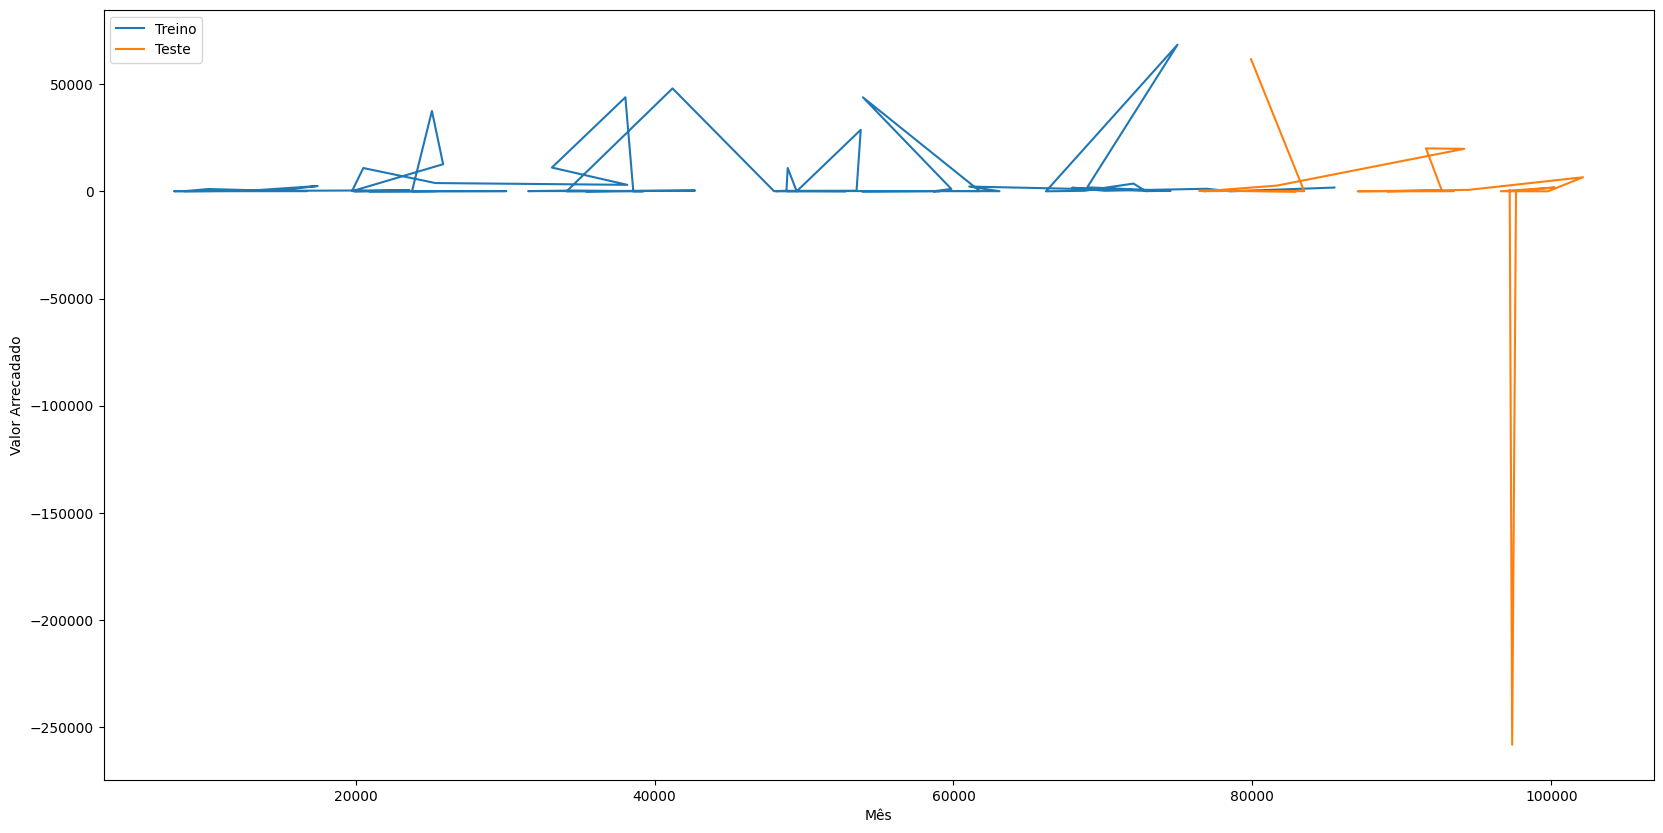

In [11]:
plt.figure(figsize=(20,10))
plt.plot(train_dataset['VALOR_ARRECADADO'])
plt.plot(test_dataset['VALOR_ARRECADADO'])
plt.xlabel('Mês')
plt.ylabel('Valor Arrecadado')
plt.legend(['Treino', 'Teste'], loc='upper left')
print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [12]:
X_train = train_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_train = train_dataset.loc[:, ['VALOR_ARRECADADO']]

In [13]:
X_test = test_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_test = test_dataset.loc[:, ['VALOR_ARRECADADO']]

In [14]:
print('Dimension of X_train data: ', X_train.shape)
print('Dimension of y_train data: ', y_train.shape)
print('Dimension of X_test data: ', X_test.shape)
print('Dimension of y_test data: ', y_test.shape)

Dimension of X_train data:  (67, 11)
Dimension of y_train data:  (67, 1)
Dimension of X_test data:  (23, 11)
Dimension of y_test data:  (23, 1)


In [15]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [16]:
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

In [17]:
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

In [18]:
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [19]:
print('Dimension of train_y_norm data: ', train_x_norm.shape)
print('Dimension of train_x_norm data: ', train_y_norm.shape)
print('Dimension of test_y_norm data: ', test_x_norm.shape)
print('Dimension of test_x_norm data: ', test_y_norm.shape)

Dimension of train_y_norm data:  (67, 11)
Dimension of train_x_norm data:  (67, 1)
Dimension of test_y_norm data:  (23, 11)
Dimension of test_x_norm data:  (23, 1)


In [20]:
X_test = test_x_norm.reshape((test_x_norm.shape[0], 1, test_x_norm.shape[1]))
X_train = train_x_norm.reshape((train_x_norm.shape[0], 1, train_x_norm.shape[1]))
y_test = test_y_norm.reshape((test_y_norm.shape[0], test_y_norm.shape[1], 1))
y_train = train_y_norm.reshape((train_y_norm.shape[0], train_y_norm.shape[1], 1))

Ajuste no modelo com 32, 64 e 128 neurônioss para verficação do mais adequado para a aplicação.

Epoch 1/100
14/14 [==============================] - 8s 127ms/step - loss: 0.0344 - val_loss: 0.0668
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0309 - val_loss: 0.0629
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0289 - val_loss: 0.0602
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0275 - val_loss: 0.0577
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0268 - val_loss: 0.0550
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0246 - val_loss: 0.0515
Epoch 7/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0233 - val_loss: 0.0473
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0212 - val_loss: 0.0423
Epoch 9/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0186 - val_loss: 0.0365
Epoch 10/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0165 - val_loss: 0.0303
E

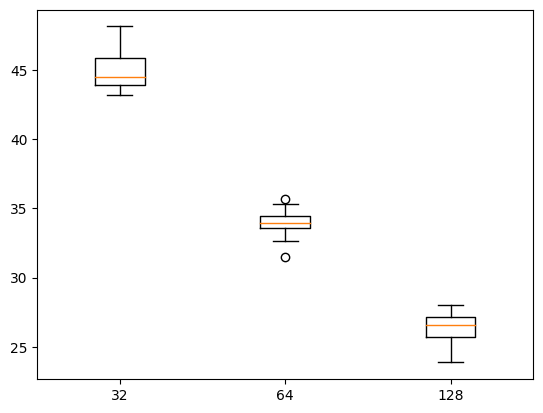

In [21]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [32, 64, 128]
run_experiment(n_params)

Epoch 1/100
14/14 [==============================] - 7s 104ms/step - loss: 0.0328 - val_loss: 0.0626
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0293 - val_loss: 0.0581
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0267 - val_loss: 0.0542
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0252 - val_loss: 0.0498
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0224 - val_loss: 0.0446
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0186 - val_loss: 0.0386
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0172 - val_loss: 0.0323
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0135 - val_loss: 0.0263
Epoch 9/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.0211
Epoch 10/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0105 - val_loss: 0.0161
Epoch

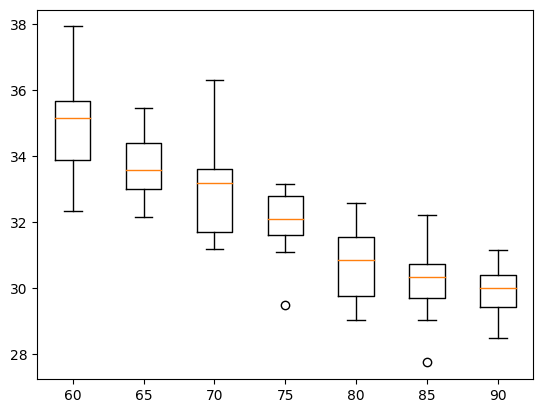

In [22]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [60, 65, 70, 75, 80, 85, 90]
run_experiment(n_params)

Ajuste de modelo com tamanho do lote 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12, para verificação do mais adequado para a aplicação.

Epoch 1/50
53/53 [==============================] - 6s 26ms/step - loss: 0.0302 - val_loss: 0.0540
Epoch 2/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0255 - val_loss: 0.0435
Epoch 3/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0177 - val_loss: 0.0297
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0128 - val_loss: 0.0180
Epoch 5/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.0081
Epoch 6/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 7.7946e-04
Epoch 8/50
53/53 [==============================] - 0s 6ms/step - loss: 7.0083e-04 - val_loss: 0.0033
Epoch 9/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 11/5

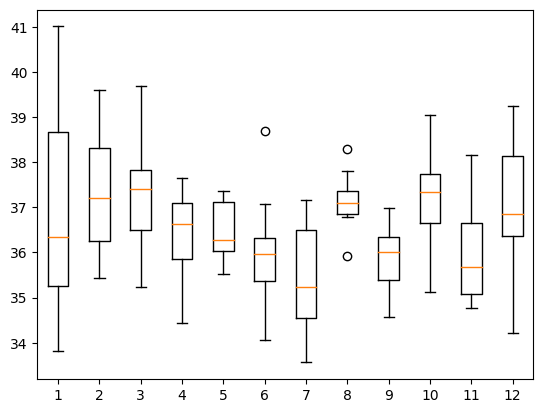

In [23]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = np.arange(1, 13)
run_experiment(n_params)

Ajuste no modelo com diluição - dropout - 0.05, 0.1, 0.2, 0.3, para verficação do mais adequado para a aplicação.

Epoch 1/50
11/11 [==============================] - 7s 126ms/step - loss: 0.0339 - val_loss: 0.0638
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 0.0291 - val_loss: 0.0582
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0265 - val_loss: 0.0535
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0235 - val_loss: 0.0478
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0204 - val_loss: 0.0407
Epoch 6/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0174 - val_loss: 0.0329
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0137 - val_loss: 0.0251
Epoch 8/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0110 - val_loss: 0.0183
Epoch 9/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0089 - val_loss: 0.0131
Epoch 10/50
11/11 [==============================] - 0s 11ms/step - loss: 0.0060 - val_loss: 0.0085
Epoch 11

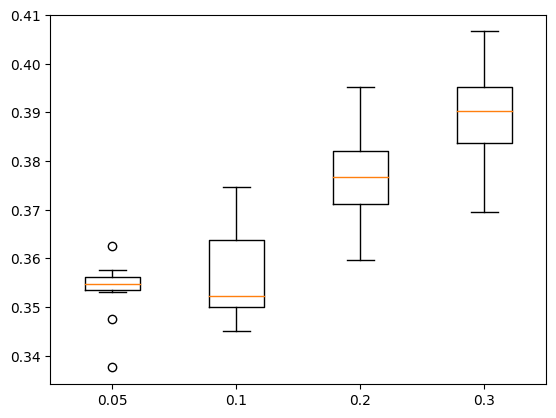

In [24]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [0.05, 0.1, 0.2, 0.3]
run_experiment(n_params)

Ajustando o modelo com os padrões mais adequados visualizados nos testes anteriores.

In [28]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 90, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(units = 90))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=150, batch_size=9, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=9)
    return loss

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print(f'Loss: Mean = {m:.3f}, Std = {s:.3f}')

# Rodando um experimento
def run_experiment(repeats = 10):
    # repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score
        scores.append(score)
        print(f'>{r+1}: Score={score}')
    # resumindo os resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

Epoch 1/150
6/6 [==============================] - 7s 232ms/step - loss: 0.0340 - val_loss: 0.0648
Epoch 2/150
6/6 [==============================] - 0s 21ms/step - loss: 0.0297 - val_loss: 0.0595
Epoch 3/150
6/6 [==============================] - 0s 15ms/step - loss: 0.0273 - val_loss: 0.0554
Epoch 4/150
6/6 [==============================] - 0s 16ms/step - loss: 0.0256 - val_loss: 0.0518
Epoch 5/150
6/6 [==============================] - 0s 15ms/step - loss: 0.0233 - val_loss: 0.0479
Epoch 6/150
6/6 [==============================] - 0s 15ms/step - loss: 0.0218 - val_loss: 0.0436
Epoch 7/150
6/6 [==============================] - 0s 15ms/step - loss: 0.0193 - val_loss: 0.0390
Epoch 8/150
6/6 [==============================] - 0s 15ms/step - loss: 0.0177 - val_loss: 0.0342
Epoch 9/150
6/6 [==============================] - 0s 15ms/step - loss: 0.0152 - val_loss: 0.0296
Epoch 10/150
6/6 [==============================] - 0s 14ms/step - loss: 0.0149 - val_loss: 0.0254
Epoch 11/150
6/6 [

Criando modelo:

In [29]:
def create_model(units, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = units))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    return model

In [30]:
model_lstm = create_model(90, 0.2)

In [31]:
def fit_model(model):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_split = 0.2, shuffle=False, callbacks=[early_stop])
    return history

In [32]:
history_lstm = fit_model(model_lstm)

Epoch 1/150
11/11 [==============================] - 7s 150ms/step - loss: 0.0336 - val_loss: 0.0638
Epoch 2/150
11/11 [==============================] - 0s 11ms/step - loss: 0.0290 - val_loss: 0.0580
Epoch 3/150
11/11 [==============================] - 0s 11ms/step - loss: 0.0266 - val_loss: 0.0535
Epoch 4/150
11/11 [==============================] - 0s 12ms/step - loss: 0.0236 - val_loss: 0.0483
Epoch 5/150
11/11 [==============================] - 0s 11ms/step - loss: 0.0217 - val_loss: 0.0424
Epoch 6/150
11/11 [==============================] - 0s 11ms/step - loss: 0.0187 - val_loss: 0.0360
Epoch 7/150
11/11 [==============================] - 0s 11ms/step - loss: 0.0152 - val_loss: 0.0294
Epoch 8/150
11/11 [==============================] - 0s 11ms/step - loss: 0.0132 - val_loss: 0.0234
Epoch 9/150
11/11 [==============================] - 0s 12ms/step - loss: 0.0095 - val_loss: 0.0182
Epoch 10/150
11/11 [==============================] - 0s 12ms/step - loss: 0.0089 - val_loss: 0.013

Salvamento do modelo:

In [33]:
model_lstm.save('receitas_2013_2022')

INFO:tensorflow:Assets written to: receitas_2013_2022\assets


INFO:tensorflow:Assets written to: receitas_2013_2022\assets


Carga do modelo salvo:

In [34]:
model_lstm = tf.keras.models.load_model('receitas_2013_2022')

Pré-processamento e predição da base de testes com a utilização do modelo carregado:

In [35]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
def prediction(model):
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [ ]:
prediction_lstm = prediction(model_lstm)

In [ ]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Mês')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('figura[1].png')
    plt.show()

In [ ]:
plot_future(prediction_lstm, y_test)

Cálculo do erro médio absoluto e raiz quadrática média:

In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predicitons - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(f'{model_name}:')
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')

SyntaxError: incomplete input (1111167682.py, line 1)

In [ ]:
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

Pré-processamento dos dados e aplicação do modelo em toda a base de dados (treino + teste):

In [ ]:
X = df_amostrado.drop(['VALOR_ARRECADADO'], axis=1)
y = df_amostrado.loc[:, ['VALOR_ARRECADADO']]

In [ ]:
y_norm = output_scaler.transform(y)
X_norm = input_scaler.transform(X)

In [ ]:
X = X_norm.reshape((X_norm.shape[0], 1, X_norm.shape[1]))
y = y_norm.reshape((y_norm.shape[0], y_norm.shape[1], 1))

In [ ]:
y = scaler_y.inverse_transform(y)

In [ ]:
def prediction(model):
    y_pred = model.predict(X)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [ ]:
prediction_lstm = prediction(model_lstm)

In [ ]:
def plot_future(prediction, y):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Mês')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('figura[2].png')
    plt.show()

Cálculo do erro médio percentual:

In [ ]:
real = y.flatten()
previsto = prediction_lstm.flatten()

In [ ]:
tabela = pd.DataFrame([real, previsto]).T
tabela = tabela.rename(columns={0: 'Real', 1: 'Previsto'})
tabela['Diferenca'] = 1 - (tabela['Real'] / tabela['Previsto'])
print(f'Erro médio percentual: {tabela['Diferenca'].mean()}')

Distribuição de erros:

In [ ]:
sns.histplot(data=tabela, x='Diferenca', kde=True)

In [ ]:
previsao = df

In [ ]:
periodo = 1 # escolha o período de previsão à frente será executado
for i in range(periodo):
    row = pd.DataFrame([], columns=previsao.columns)
    row.loc[0, 'SMA(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12:].mean()
    row.loc[0, 'SMA(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6:].mean()
    row.loc[0, 'SMA(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3:].mean()
    row.loc[0, 'SMA(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2:].mean()
    row.loc[0, 'lag(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12]
    row.loc[0, 'lag(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6]
    row.loc[0, 'lag(4)'] = previsao['VALOR_ARRECADADO'].iloc[-4]
    row.loc[0, 'lag(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3]
    row.loc[0, 'lag(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2]
    row.loc[0, 'lag(1)'] = previsao['VALOR_ARRECADADO'].iloc[-1]
    row.loc[0, 'DATA'] = previsao['DATA'].iloc[-1] + 1
    row = row.drop(['VALOR_ARRECADADO'], axis=1)
    row = np.array(row.iloc[-1]).reshape(1,-1)
    row_norm = input_scaler.transform(row)
    to_prev = row_norm.reshape((row_norm.shape[0], 1, row_norm.shape[1]))
    prev = model_lstm.predict(to_prev)
    prev = scaler_y.inverse_transform(prev)
    row_ = pd.DataFrame(row, columns= ['DATA', 'SMA(12)', 'SMA(6)', 'SMA(3)', 'SMA(2)', 'lag(12)', 'lag(6)', 'lag(4)', 'lag(3)', 'lag(2)', 'lag(1)'])
    row_.loc[0, 'VALOR_ARRECADADO'] = prev[0]
    previsao = previsao.append(row_)
